# __SpringBoard Capstone Project 2: Human Activity Recognition__
## __Machine Learning__

__Written by: Sofy Weisenberg__<br>
__Date: 04/19/20__

__Importing the Data__<br>
Load the data from file into a pandas dataframe. The raw data has been pre-processed and the feature engineering has already been performed to create a processed dataset. See the project report for more details on those steps. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
import time

# Use the current working directory path to navigate to the location of the processed data
cwd_path = os.getcwd()
data_path = os.path.join(cwd_path, '..', 'data', 'processed')

# Throw an assert error if the path does not exist
assert os.path.exists(data_path)

In [2]:
# Read the fully processed dataframe from file (df created and saved in Exploratory Data Analysis notebook)
full_data_df = pd.read_csv(os.path.join(data_path,'full_data_df.csv'))

__Initial Exploration__<br>
Now that the data has been loaded, the dataframe can be examined to gain a clearer picture of the data structure and features.

In [3]:
full_data_df.info()

# Throw an assert error if there are any missing values in the dataset
assert (full_data_df.isnull().sum().sum() == 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [4]:
# Display a few rows of the data
full_data_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


It can be seen that there are a total of 10299 rows and 563 columns, with no missing values. The feature data is all data type float64, and the last 2 columns are the subject number (int64) and the activity class (object).

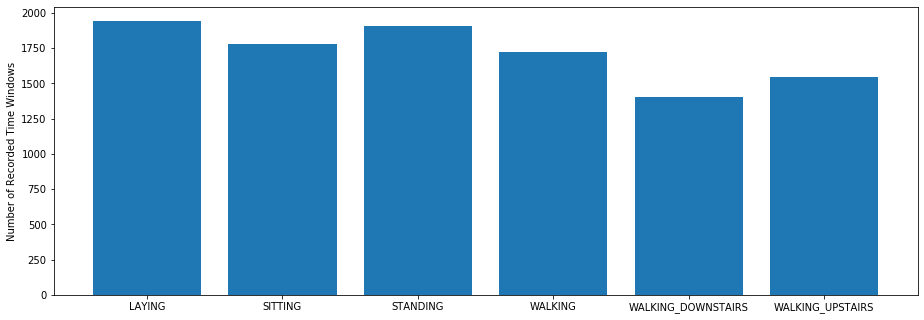

In [5]:
# plot the distribution of recorded time windows across various activities
counts = full_data_df.groupby('Activity').count().subject.values
activities = full_data_df.groupby('Activity').count().subject.index
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(activities, counts)
ax.set_ylabel('Number of Recorded Time Windows')
plt.show()

The various activity classes are approximately evenly distributed since each subject performed each of the six activities. This means that for classification modeling, this is a balanced (rather than an imbalanced) dataset.

Next, it would be helpful to see a summary of the descriptive statistics for the data. This is done using the .describe() method.

In [6]:
full_data_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [7]:
# Check all columns for range [-1, 1]

def check_range(dataframe, range_min, range_max):
    columns = list(dataframe)
    max_false_count = 0
    min_false_count = 0
    
    # Loop over feature columns to check min, max (rounded to avoid float mismatches)
    for column in columns:
        if round(max(dataframe[column]),4) != range_max:
            max_false_count += 1
            print(f'Max value is not {range_max} for column: ' + str(column))
        if round(min(dataframe[column]),4) != range_min:
            min_false_count += 1
            print(f'Min value is not {range_min} for column: ' + str(column))
        
    # Throw an assert error if there are columns for which the range is not[range_min, range_max]
    assert (max_false_count == 0)        
    assert (min_false_count == 0)
    
    return

In [8]:
check_range(full_data_df.drop(['subject', 'Activity'], axis=1),-1,1)

From the results of the .describe() method and the two passing assert statements in the function defined above, it appears that the data has already been scaled to a range of [-1, 1] for all feature columns, which is helpful for both data visualization and machine learning to some extent. Additional scaling will need to be performed to make the data more usable for a supervised learning classification model (see section on Feature Scaling).

__Splitting the Data: Training and Test Sets__<br>
In order to allow for evaluation of the machine learning (ML) model, it is critical to split the full data set into a training set (used to train the ML model) and a test set (used to evaluate the model's performance). 

In this case, a stratified split is important (i.e. making sure that the classes are represented in both the training and test sets relatively equally). Also, it must be taken into account that entire activities and subject sets should be kept together. Movement patterns of the same subject should be segregated so as not to bias the test set. 

Therefore of the 30 participating subjects' data, 30% (9 subjects) will be segregated into the test set and saved for the evaluation phase. These subjects have been selected randomly (Kaggle has already provided the data in train/test split for this dataset.)

***Question***: Should the training be rerun after evaluation on the entire data set so that all samples may be utilized for training?

In [9]:
# read train/test data from file
train_data_df = pd.read_csv(os.path.join(data_path,'train.csv'))
test_data_df = pd.read_csv(os.path.join(data_path,'test.csv'))

# define train/test feature matrices (X) and class label vectors (y)
X_train = train_data_df.drop(['Activity', 'subject'], axis=1)
X_test = test_data_df.drop(['Activity', 'subject'], axis=1)
y_train = train_data_df['Activity']
y_test = test_data_df['Activity']
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7352, 561) (2947, 561)
(7352,) (2947,)


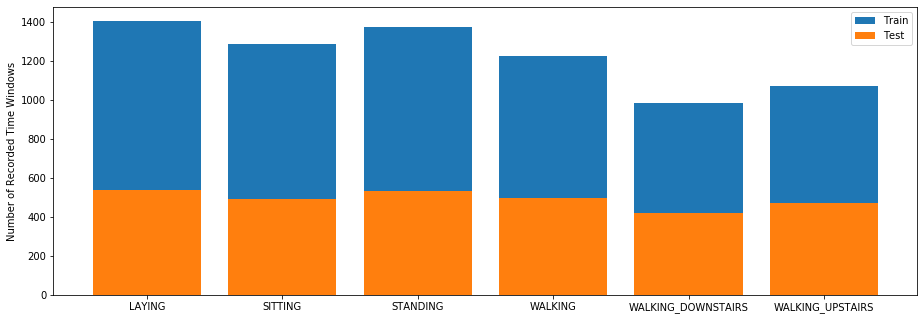

In [10]:
# check activity distribution between train and test sets

activities, train_counts = np.unique(y_train, return_counts=True)
activities, test_counts = np.unique(y_test, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(activities, train_counts, label='Train')
ax.bar(activities, test_counts, label='Test')
ax.set_ylabel('Number of Recorded Time Windows')
ax.legend(loc='upper right')
plt.show()

__Feature Scaling__<br>
To improve performance of the machine learning model(s) to be applied to this classification problem, first the feature data should be appropriately scaled.

Scaling must be performed both on the training and test data sets in the same manner. Best practice is to use only the training set to identify the correct scaling, and then blindly apply the same transformation to the test set. In this case, the feature matrix will be standardized (i.e. the mean of each feature set to zero and the std dev set to 1).

In [11]:
from sklearn.preprocessing import StandardScaler

# apply standardization to training feature matrix and then to test feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# check the transformed data
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,...,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03
mean,-3.131336e-16,4.832309e-17,8.988095e-17,-1.507680e-16,7.731695e-18,2.938044e-16,3.865847e-17,-9.278034e-17,5.412186e-17,1.237071e-16,...,-9.664618e-18,7.924987e-17,2.532130e-16,3.382616e-18,-2.319508e-17,-2.053731e-17,3.769201e-17,1.005120e-16,3.865847e-18,7.731695e-18
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,...,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,-1.814049e+01,-2.407152e+01,-1.573085e+01,-8.793362e-01,-9.727918e-01,-9.440787e-01,-8.713436e-01,-9.736247e-01,-9.511122e-01,-9.759168e-01,...,-4.483658e+00,-2.144460e+00,-1.217541e+00,-2.925683e+00,-2.235646e+00,-1.658375e+00,-2.079788e+00,-9.974223e-01,-3.558777e+00,-3.380417e+00
25%,-1.638693e-01,-1.756427e-01,-2.092798e-01,-8.631868e-01,-9.295295e-01,-8.968638e-01,-8.562288e-01,-9.286823e-01,-9.034203e-01,-8.587814e-01,...,-5.936244e-01,-7.339585e-01,-7.162086e-01,-3.866541e-01,-6.507937e-01,-8.072166e-01,-7.749059e-01,-6.301983e-01,-2.571022e-01,-3.113525e-01
50%,3.850502e-02,1.167141e-02,8.206943e-03,-7.594273e-01,-6.783764e-01,-6.081593e-01,-7.551036e-01,-6.800064e-01,-6.061248e-01,-7.585419e-01,...,3.468984e-02,-1.142597e-01,-2.809130e-01,2.451015e-03,1.507318e-02,1.477537e-05,1.174412e-02,-4.296252e-01,4.151086e-01,2.138846e-01
75%,1.988854e-01,1.693906e-01,2.003738e-01,8.081625e-01,9.484617e-01,8.177048e-01,7.966913e-01,9.471052e-01,8.222278e-01,8.291412e-01,...,6.526596e-01,5.608611e-01,3.947685e-01,4.222002e-01,6.484291e-01,8.178415e-01,7.644196e-01,-3.816570e-02,6.379332e-01,5.882181e-01
max,1.032661e+01,2.493878e+01,1.958529e+01,3.577947e+00,2.839526e+00,3.833088e+00,3.845150e+00,3.075829e+00,3.878713e+00,2.697113e+00,...,3.272840e+00,4.039226e+00,5.144111e+00,2.943656e+00,2.225893e+00,1.627550e+00,2.096610e+00,2.910568e+00,1.410491e+00,3.785390e+00


The scaling transformation has been performed successfully on both the training and test feature sets. <br>
- For each column in the X_train_scaled feature matrix, the mean is set to zero and the std dev is set to 1 <br>
- For each column in the X_test_scaled feature matrix, the mean is ***NOT*** set to zero and the std dev is ***NOT*** set to 1, since a transformation matrix (generated from normalizing the training feature matrix range) was applied to the test feature matrix.

__Categorical Class Encoding__<br>
Since the class labels (Activity column) for this data are in a categorical string format, they must first be encoded to a numerical format useable for supervised machine learning. Simple integer encoding (i.e. translating each class label into an integer label 1-6) would not be effective on its own in this case, since such an encoding implies an ordinal relationship between the classes, where in reality there is none. This may result in poor model performance or unexpected results.

Integer encoding followed by one-hot encoding is the preferred method to transform the categorical data. Each integer class label is assigned to a new binary (0/1) column of "dummy variables". Each observation in the dataset is then be labeled with a 1 in only one of these "dummy variable" columns and the rest are labeled with a 0, resulting in sparse matrices of class labels for y_train and y_test. 

In [13]:
from sklearn.preprocessing import LabelEncoder

# perform integer encoding of both y_train and y_test
le = LabelEncoder()
y_train_le_encoded = le.fit_transform(y_train)
y_test_le_encoded = le.fit_transform(y_test)

print("Integer encoded class labels and counts (training set): \n" 
      + str(np.unique(y_train_le_encoded, return_counts=True)) + '\n')
print("Integer encoded class labels and counts (test set): \n" 
      + str(np.unique(y_test_le_encoded, return_counts=True)))


Integer encoded class labels and counts (training set): 
(array([0, 1, 2, 3, 4, 5]), array([1407, 1286, 1374, 1226,  986, 1073], dtype=int64))

Integer encoded class labels and counts (test set): 
(array([0, 1, 2, 3, 4, 5]), array([537, 491, 532, 496, 420, 471], dtype=int64))


In [14]:
from sklearn.preprocessing import OneHotEncoder

# perform integer encoding of both y_train and y_test, reshape method required for 1D array input
enc = OneHotEncoder()
y_train_encoded = enc.fit_transform(y_train_le_encoded.reshape(-1, 1))
y_test_encoded = enc.fit_transform(y_test_le_encoded.reshape(-1, 1))

# check outputs are sparse matrices with 6 "dummy variable" columns
y_train_encoded, y_test_encoded

(<7352x6 sparse matrix of type '<class 'numpy.float64'>'
 	with 7352 stored elements in Compressed Sparse Row format>,
 <2947x6 sparse matrix of type '<class 'numpy.float64'>'
 	with 2947 stored elements in Compressed Sparse Row format>)

__Fitting an SVM Model__<br>
In previous published papers (most notably: https://upcommons.upc.edu/bitstream/handle/2117/101769/IWAAL2012.pdf), a support vector machine (SVM) was used successfully to harness the engineered features to implement a lightweight multi-class machine learning classifier. 

As a baseline for comparison of deep learning techniques that will be implemented later in this project, the SVM model is fit to the training data and evaluated. Deep learning models can effectively work on the raw time series data, but require heavier computational resources, while traditional machine learning models perform better when feature engineering is performed beforehand with sufficient domain knowledge applied.

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# define default random state so that all future random actions will be repeatable
random_state = np.random.RandomState(0)

svc = SVC(probability = True, random_state=random_state)

# define hyperparameter options
param_grid = {'C': [1, 10, 1000, 10000],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

# scoring is F1 = 2 * (precision * recall) / (precision + recall)
# grid = GridSearchCV(estimator=svc,
#                     param_grid=param_grid,
#                     scoring='f1',
#                     verbose=1,
#                     n_jobs=-1,
#                     cv = StratifiedKFold(n_splits=5, shuffle=True))

grid = GridSearchCV(svc, param_grid, cv=5)

grid_result = grid.fit(X_train_scaled, y_train_le_encoded)

print('Best Score (F1): ' '{0:0.4f}'.format(grid_result.best_score_))
print('Best Params: ', grid_result.best_params_)

Best Score (F1): 0.9383
Best Params:  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [60]:
# define function for creating labeled confusion matrix for multiclass identification
def label_confusion_mat(confusion_mat, labels):
    confusion_matrix_labeled = pd.DataFrame(confusion_matrix(y_train, y_train_pred))
    confusion_matrix_labeled.columns = list(labels)
    confusion_matrix_labeled.index = list(labels)
    return confusion_matrix_train

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# evaluate SVM model on training set
model = grid_result.best_estimator_
y_train_pred_encoded = model.predict(X_train_scaled)
y_train_pred = le.inverse_transform(y_train_pred_encoded)
#y_proba = model.predict_proba(X_test_scaled)

print('Confusion matrix for SVM evaluation on training set:\n')
print(confusion_matrix(y_train, y_train_pred))
print('\nClassification report for SVM evaluation on training set:\n')
print(classification_report(y_train, y_train_pred, target_names=list(activities)))

Confusion matrix for SVM evaluation on training set:

[[1407    0    0    0    0    0]
 [   0 1276   10    0    0    0]
 [   0   13 1361    0    0    0]
 [   0    0    0 1226    0    0]
 [   0    0    0    0  986    0]
 [   0    0    0    0    0 1073]]

Classification report for SVM evaluation on training set:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1407
           SITTING       0.99      0.99      0.99      1286
          STANDING       0.99      0.99      0.99      1374
           WALKING       1.00      1.00      1.00      1226
WALKING_DOWNSTAIRS       1.00      1.00      1.00       986
  WALKING_UPSTAIRS       1.00      1.00      1.00      1073

          accuracy                           1.00      7352
         macro avg       1.00      1.00      1.00      7352
      weighted avg       1.00      1.00      1.00      7352



In [50]:
# evaluate SVM model on test set

y_test_pred_encoded = model.predict(X_test_scaled)
y_test_pred = le.inverse_transform(y_test_pred_encoded)
#y_proba = model.predict_proba(X_test_scaled)

print('Confusion matrix for SVM evaluation on test set:\n')
print(confusion_matrix(y_test, y_test_pred))
print('\nClassification report for SVM evaluation on test set:\n')
print(classification_report(y_test, y_test_pred, target_names=list(activities)))

Confusion matrix for SVM evaluation on test set:

[[537   0   0   0   0   0]
 [  0 436  54   0   0   1]
 [  0  15 517   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   5 398  17]
 [  0   0   0  16   2 453]]

Classification report for SVM evaluation on test set:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.96      0.99      0.98       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.96      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



__Visualizing Misclassified Activities__<br>
To better understand the limitations of the evaluated SVM model, it is helpful to visualize some of the signal data from activity instances that were misclassified by the model.

In [88]:
# Create a function to plot x, y, z total acceleration for a given subject and activity

def plot_acceleration(ax, df, subject, true_activity, pred_activity):
    # filter dataframe by (subject, activity)
    df_by_sub_act = df[(df.subject == subject) & (df.Activity == true_activity)]
    
    # create x-axis array of 2.5 second windows w/50% overlap, based on (subject, activity) specific number of data points
    #x_values = np.arange(0, len(df_by_sub_act.index)*2.56/2 ,2.56/2)
    x_values = np.linspace(0, len(df_by_sub_act.index)*2.56/2 ,num=len(df_by_sub_act.index))
    
    # get the mean accelaration data
    x_acc = df_by_sub_act['tBodyAcc-mean()-X']
    y_acc = df_by_sub_act['tBodyAcc-mean()-Y']   
    z_acc = df_by_sub_act['tBodyAcc-mean()-Z']
    
    # plot all three lines on one plot and add legend, axis labels, and title
    ax.plot(x_values, x_acc, label = 'X')
    ax.plot(x_values, y_acc, label = 'Y')
    ax.plot(x_values, z_acc, label = 'Z')
    ax.legend(loc = 'upper right')
    ax.set_title(f'Subject {subject}, True Activity: {true_activity}, Pred Activity: {pred_activity}')

In [95]:
# Find example indices for 1 example of each the matched and mismatched activities
# Note: the confusion matrix for the train set evaluation shows 2 types of class mismatches

match_indices_1 = []
match_indices_2 = []
mismatch_indices_1 = []
mismatch_indices_2 = []

# search for 1 example each
for i in range(len(y_train)):
    if y_train[i] == 'STANDING' and y_train_pred[i] == 'STANDING' and len(match_indices_1) < 1:
            match_indices_1.append(i)
    if y_train[i] == 'SITTING' and y_train_pred[i] == 'SITTING' and len(match_indices_2) < 1:
            match_indices_2.append(i)    
    if y_train[i] == 'STANDING' and y_train_pred[i] == 'SITTING' and len(mismatch_indices_1) < 1:
            mismatch_indices_1.append(i)
    if y_train[i] == 'SITTING' and y_train_pred[i] == 'STANDING' and len(mismatch_indices_2) < 1:
            mismatch_indices_2.append(i)
            
idx1 = match_indices_1[0]
idx2 = match_indices_2[0]
idx3 = mismatch_indices_1[0]
idx4 = mismatch_indices_2[0]

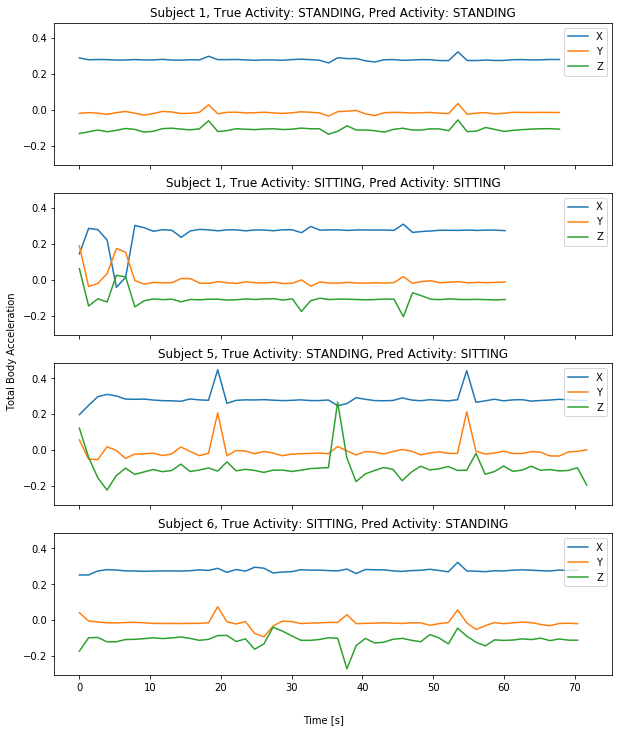

In [96]:
# Create subplots for 1 example of each mismatched class in the training set
fig, axs = plt.subplots(nrows=4, sharex=True, sharey=True,figsize=(10, 12))
fig.text(0.5, 0.07, 'Time [s]', ha='center')
fig.text(0.06, 0.5, 'Total Body Acceleration', va='center', rotation='vertical')

plot_acceleration(axs[0], train_data_df, train_data_df.subject[idx1], y_train[idx1], y_train_pred[idx1])
plot_acceleration(axs[1], train_data_df, train_data_df.subject[idx2], y_train[idx2], y_train_pred[idx2])
plot_acceleration(axs[2], train_data_df, train_data_df.subject[idx3], y_train[idx3], y_train_pred[idx3])
plot_acceleration(axs[3], train_data_df, train_data_df.subject[idx4], y_train[idx4], y_train_pred[idx4])
plt.show()

In [110]:
# Find example indices for 1 example of each the matched and mismatched activities
# Note: the confusion matrix for the testing set evaluation shows 7 types of class mismatches

mismatch_indices_5 = []
mismatch_indices_6 = []
mismatch_indices_7 = []
mismatch_indices_8 = []
mismatch_indices_9 = []
mismatch_indices_10 = []
mismatch_indices_11 = []

# search for 1 example each
for i in range(len(y_test)):   
    if y_test[i] == 'STANDING' and y_test_pred[i] == 'SITTING' and len(mismatch_indices_5) < 1:
            mismatch_indices_5.append(i)
            #idx5 = i
    if y_test[i] == 'SITTING' and y_test_pred[i] == 'STANDING' and len(mismatch_indices_6) < 1:
            mismatch_indices_6.append(i)
            #idx6 = i
    if y_test[i] == 'WALKING' and y_test_pred[i] == 'WALKING_DOWNSTAIRS' and len(mismatch_indices_7) < 1:
            mismatch_indices_7.append(i)
            #idx7 = i
    if y_test[i] == 'WALKING_DOWNSTAIRS' and y_test_pred[i] == 'WALKING' and len(mismatch_indices_8) < 1:
            mismatch_indices_8.append(i)
            #idx8 = i
    if y_test[i] == 'WALKING_UPSTAIRS' and y_test_pred[i] == 'WALKING' and len(mismatch_indices_9) < 1:
            mismatch_indices_9.append(i)
            #idx9 = i
    if y_test[i] == 'WALKING_UPSTAIRS' and y_test_pred[i] == 'WALKING_DOWNSTAIRS' and len(mismatch_indices_10) < 1:
            mismatch_indices_10.append(i)
            #idx10 = i
    if y_test[i] == 'WALKING_DOWNSTAIRS' and y_test_pred[i] == 'WALKING_UPSTAIRS' and len(mismatch_indices_11) < 1:
            mismatch_indices_11.append(i)
            #idx11 = i

idx5 = mismatch_indices_5[0]
idx6 = mismatch_indices_6[0]
idx7 = mismatch_indices_7[0]
idx8 = mismatch_indices_8[0]
idx9 = mismatch_indices_9[0]
idx10 = mismatch_indices_10[0]
idx11 = mismatch_indices_11[0]

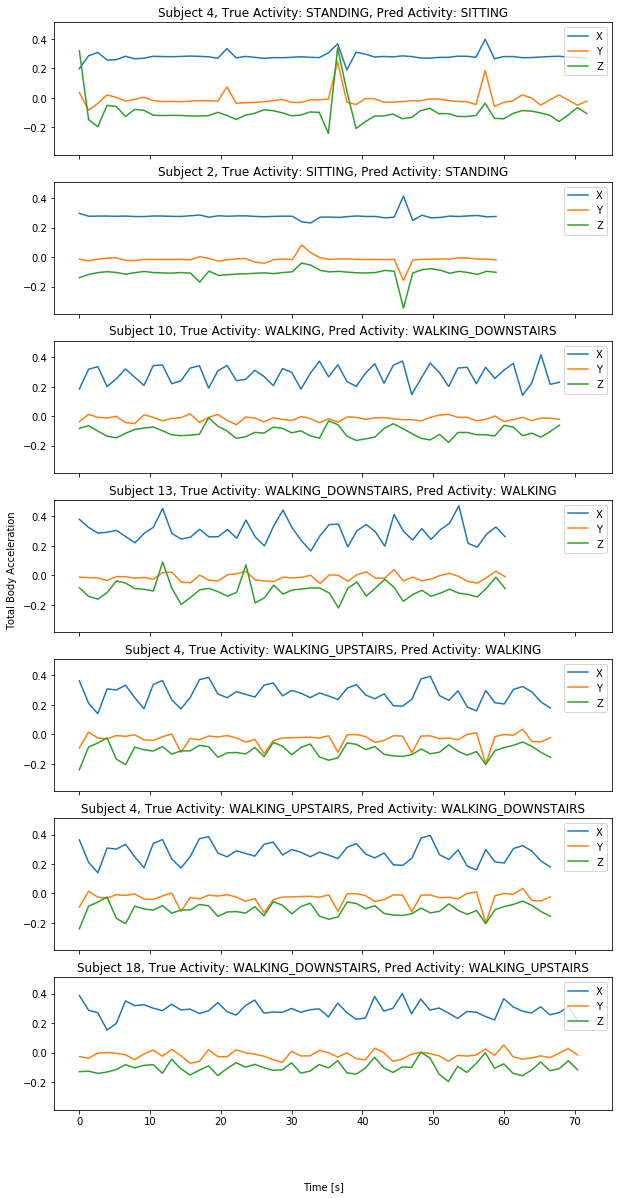

In [113]:
# Create subplots for 1 example of each mismatched class in the test set
fig, axs = plt.subplots(nrows=7, sharex=True, sharey=True,figsize=(10, 20))
fig.text(0.5, 0.07, 'Time [s]', ha='center')
fig.text(0.06, 0.5, 'Total Body Acceleration', va='center', rotation='vertical')

plot_acceleration(axs[0], test_data_df, test_data_df.subject[idx5], y_test[idx5], y_test_pred[idx5])
plot_acceleration(axs[1], test_data_df, test_data_df.subject[idx6], y_test[idx6], y_test_pred[idx6])
plot_acceleration(axs[2], test_data_df, test_data_df.subject[idx7], y_test[idx7], y_test_pred[idx7])
plot_acceleration(axs[3], test_data_df, test_data_df.subject[idx8], y_test[idx8], y_test_pred[idx8])
plot_acceleration(axs[4], test_data_df, test_data_df.subject[idx9], y_test[idx9], y_test_pred[idx9])
plot_acceleration(axs[5], test_data_df, test_data_df.subject[idx10], y_test[idx10], y_test_pred[idx10])
plot_acceleration(axs[6], test_data_df, test_data_df.subject[idx11], y_test[idx11], y_test_pred[idx11])

plt.show()